# Jyo Sahoo

## Research question/interests

My area of concern is the correlation between familial and social relationships and the alcohol consumption of a student. Does a student's social and home life affect their academic progress? If so then do students turn to alcohol to cope with such familial and/or social discomfort? These questions hold personal value to me.


In [132]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [133]:
data = pd.read_csv("../data/raw/student-merged.csv")
data.shape
print(f"number of columns in dataset : {len(data.columns)}")
print(f"number of rows in dataset : {len(data)}")
print(data.head()) #printing the first few rows to tell me what the dataset is about
print(data.isnull().sum()) #there are 0 null values!
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))





number of columns in dataset : 54
number of rows in dataset : 382
   Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
0           1     GP   F   15       R     GT3       T     1     1   at_home   
1           2     GP   F   15       R     GT3       T     1     1     other   
2           3     GP   F   15       R     GT3       T     2     2   at_home   
3           4     GP   F   15       R     GT3       T     2     4  services   
4           5     GP   F   15       R     GT3       T     3     3  services   

   ... famrel.y freetime.y goout.y Dalc.y Walc.y  health.y  absences.y  G1.y  \
0  ...        3          1       2      1      1         1           4    13   
1  ...        3          3       4      2      4         5           2    13   
2  ...        4          3       1      1      1         2           8    14   
3  ...        4          3       2      1      1         5           2    10   
4  ...        4          2       1      2      3         3 

,Unnamed: 0,age,Medu,Fedu,traveltime.x,studytime.x,failures.x,famrel.x,freetime.x,goout.x,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,191.500000,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,110.418145,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,96.250000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,191.500000,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,286.750000,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,382.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [134]:
print(f"number of students with parents who are cohabiting = {len(data[data['Pstatus']=='T'])}") 
print(f"number of students with parents who are not cohabiting = {len(data[data['Pstatus']=='A'])}")
# I discovered that almost 90% of the students' parents live together.
print(data[data['Pstatus']=='T'].head())




number of students with parents who are cohabiting = 344
number of students with parents who are not cohabiting = 38
   Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
0           1     GP   F   15       R     GT3       T     1     1   at_home   
1           2     GP   F   15       R     GT3       T     1     1     other   
2           3     GP   F   15       R     GT3       T     2     2   at_home   
3           4     GP   F   15       R     GT3       T     2     4  services   
4           5     GP   F   15       R     GT3       T     3     3  services   

   ... famrel.y freetime.y goout.y Dalc.y Walc.y  health.y  absences.y  G1.y  \
0  ...        3          1       2      1      1         1           4    13   
1  ...        3          3       4      2      4         5           2    13   
2  ...        4          3       1      1      1         2           8    14   
3  ...        4          3       2      1      1         5           2    10   
4  ...  

[]

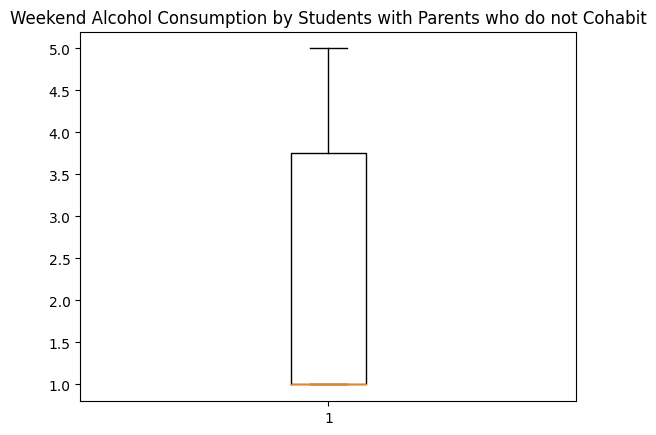

In [135]:
box = plt.boxplot(data[data['Pstatus']=='A']['Walc.x'])
plt.title("Weekend Alcohol Consumption by Students with Parents who do not Cohabit")
plt.plot()



[]

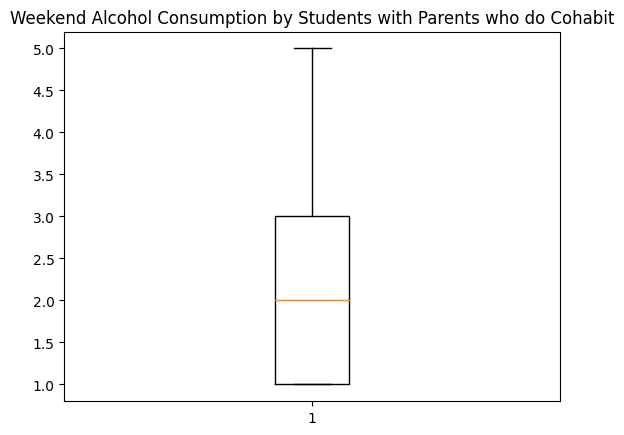

In [136]:
plt.boxplot(data[data['Pstatus']=='T']['Walc.x'])
plt.title("Weekend Alcohol Consumption by Students with Parents who do Cohabit")
plt.plot()

Comparing these two boxplots, I infer that the maximum alcohol consumption of students who's parents do not cohabit is more than those who's parents do cohabit. However 

<AxesSubplot: xlabel='Pstatus', ylabel='count'>

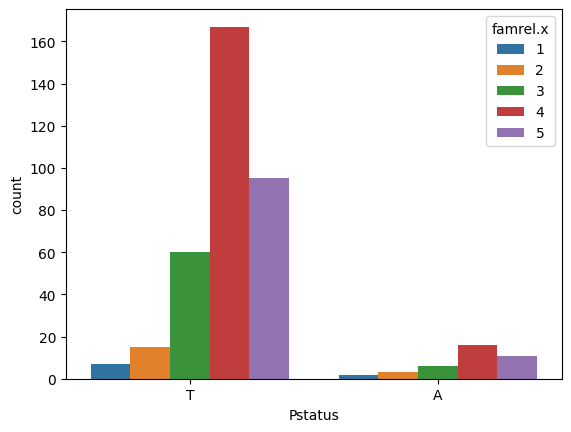

In [137]:
data.head()
sns.countplot(data=data,x='Pstatus',hue="famrel.x")


<AxesSubplot: xlabel='failures.x', ylabel='count'>

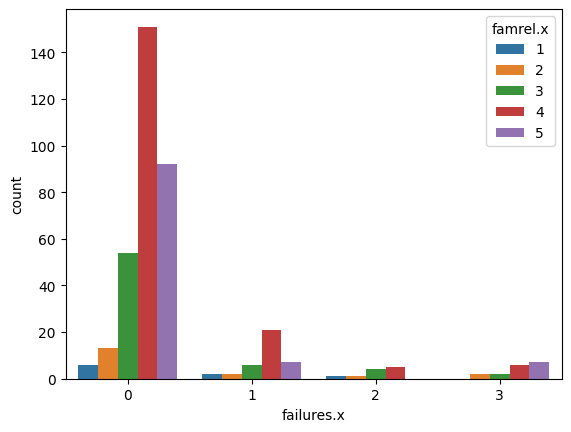

In [138]:
data.head()
sns.countplot(data=data,x='failures.x',hue="famrel.x")

The graph above makes it abundantly clar that parents' cohabitation status does not affect the relationship of the students with their parents.


### Task 2 : Analysis Pipeline

In [139]:
#  data has been loaded already
# print(data.isnull().sum()) # there are zero null values
data_cleaned = data.copy().drop(['sex','school','address','Medu','Fedu','Mjob','Fjob','reason','guardian.x','guardian.y','traveltime.x','traveltime.y','schoolsup.x','schoolsup.y','paid.x','paid.y','famsup.x','famsup.y','nursery','health.x','health.y','higher.x','higher.y','Dalc.y','Walc.y','famrel.y','freetime.y','absences.y','studytime.y','romantic.y','goout.y','failures.y','activities.y','studytime.x'],axis=1)

# using only one column to store the average of all three math grades
data_cleaned['math_avg'] = (data_cleaned['G1.x']+data_cleaned['G2.x']+data_cleaned['G3.x'])/3 
data_cleaned = data_cleaned.drop(['G1.x','G2.x','G3.x'],axis=1)

# using only one column to store the average of all three math grades
data_cleaned['por_avg'] = (data_cleaned['G1.y']+data_cleaned['G2.y']+data_cleaned['G3.y'])/3
data_cleaned = data_cleaned.drop(['G1.y','G2.y','G3.y'],axis=1)

# renaming 'unnamed: 0' to student_id
data_cleaned = data_cleaned.rename(columns={'Unnamed: 0':'student_id', 'failures.x':'failures', 'activities.x':'activities', 'romantic.x':'romantic_relationship','Walc.x':'Weekend_alcohol','Dalc.x':'Weekday_alcohol', 'famrel.x':'family_relationship','freetime.x':'freetime','goout.x':'socialising','absences.x':'absence'})
print(data_cleaned.columns.values.tolist())









['student_id', 'age', 'famsize', 'Pstatus', 'internet', 'failures', 'activities', 'romantic_relationship', 'family_relationship', 'freetime', 'socialising', 'Weekday_alcohol', 'Weekend_alcohol', 'absence', 'math_avg', 'por_avg']


### Task 3 : Method Chaining

In [163]:
def load_and_process(url_or_path):
    df = (
        pd.read_csv(url_or_path))
        # .rename(columns={'Unnamed: 0':'student_ic', 'failures.x':'failures', 'activities.x':'activities', 'romantic.x':'romantic_relationship','Walc.x':'Weekend_alcohol','Dalc.x':'Weekday_alcohol', 'famrel.x':'family_relationship','freetime.x':'freetime','goout.x':'socialising','absences.x':'absence'})    )
    df2 = (
        df
        .assign(math_avg = lambda x :df['G1.x']+df['G2.x']+df['G3.x'])
        .assign(por_avg = lambda x :df['G1.y']+df['G2.y']+df['G3.y'])
    )
    
    df3 = (
        df2.drop(['sex','school','address','Medu','Fedu','Mjob','Fjob','reason','guardian.x','guardian.y','traveltime.x','traveltime.y','schoolsup.x','schoolsup.y','paid.x','paid.y','famsup.x','famsup.y','nursery','health.x','health.y','higher.x','higher.y','Dalc.y','Walc.y','famrel.y','freetime.y','absences.y','studytime.y','romantic.y','goout.y','failures.y','activities.y','studytime.x'],axis=1)
    )

    return df3